In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Comment this if the data visualisations doesn't work on your side
%matplotlib inline
plt.style.use('bmh')
#show all all the columns in the df
pd.pandas.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv(r"data.csv")
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


# Data Analysis/Preprocessing

In [4]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [6]:
df.shape

(148670, 34)

## Statistical Analysis 

In [7]:
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [8]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 34)


In [9]:
df.count()

ID                           148670
year                         148670
loan_limit                   145326
Gender                       148670
approv_in_adv                147762
loan_type                    148670
loan_purpose                 148536
Credit_Worthiness            148670
open_credit                  148670
business_or_commercial       148670
loan_amount                  148670
rate_of_interest             112231
Interest_rate_spread         112031
Upfront_charges              109028
term                         148629
Neg_ammortization            148549
interest_only                148670
lump_sum_payment             148670
property_value               133572
construction_type            148670
occupancy_type               148670
Secured_by                   148670
total_units                  148670
income                       139520
credit_type                  148670
Credit_Score                 148670
co-applicant_credit_type     148670
age                         

## Percentatage of Missing value in each column

In [10]:
col_with_NaN=[col for col in df.columns if df[col].isnull().sum()>0]


for column in col_with_NaN:
    
    
    print(column,np.round(df[column].isnull().mean(),4),'% missing values')

loan_limit 0.0225 % missing values
approv_in_adv 0.0061 % missing values
loan_purpose 0.0009 % missing values
rate_of_interest 0.2451 % missing values
Interest_rate_spread 0.2464 % missing values
Upfront_charges 0.2666 % missing values
term 0.0003 % missing values
Neg_ammortization 0.0008 % missing values
property_value 0.1016 % missing values
income 0.0615 % missing values
age 0.0013 % missing values
submission_of_application 0.0013 % missing values
LTV 0.1016 % missing values
dtir1 0.1622 % missing values


## Checking for numerical and Object features

In [11]:
def count_features(data):
    #Getting column with objects dtype
    objects= data.select_dtypes(include=['object']).columns
    numerical=data.select_dtypes(include=['int64']).columns
    floating=data.select_dtypes(include=['float64']).columns
    
    print('Numerical features are :',len(numerical))
    print('Objects features are  :',len(objects))
    print('Floating features are :',len(floating))

In [12]:
count_features(df)

Numerical features are : 5
Objects features are  : 21
Floating features are : 8


## Checking count of Eligibility by gender

In [13]:
gen=df.groupby(['Gender','Status']).size().reset_index().rename(columns={0:'Total Count'})
gen

,Gender,Status,Total Count
0,Female,0,20418
1,Female,1,6848
2,Joint,0,33466
3,Joint,1,7933
4,Male,0,31255
5,Male,1,11091
6,Sex Not Available,0,26892
7,Sex Not Available,1,10767


<AxesSubplot:xlabel='Gender', ylabel='Total Count'>

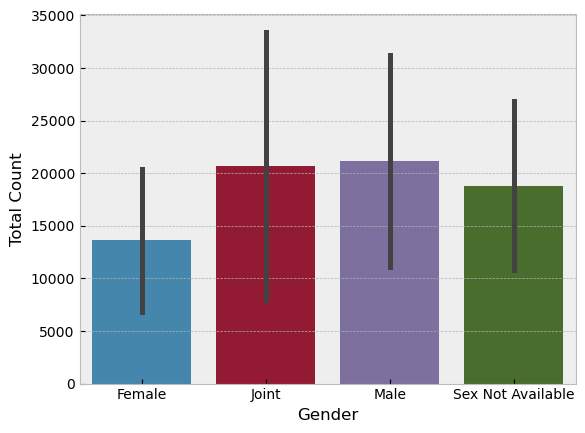

In [14]:
 sns.barplot(x='Gender',y='Total Count',data=gen)

## Checking unique values in each Object feature

In [15]:
df.nunique()

ID                           148670
year                              1
loan_limit                        2
Gender                            4
approv_in_adv                     2
loan_type                         3
loan_purpose                      4
Credit_Worthiness                 2
open_credit                       2
business_or_commercial            2
loan_amount                     211
rate_of_interest                131
Interest_rate_spread          22516
Upfront_charges               58271
term                             26
Neg_ammortization                 2
interest_only                     2
lump_sum_payment                  2
property_value                  385
construction_type                 2
occupancy_type                    3
Secured_by                        2
total_units                       4
income                         1001
credit_type                       4
Credit_Score                    401
co-applicant_credit_type          2
age                         

In [16]:
def count_unique_values(data):
    #Getting column with objects dtype
    objects= df.select_dtypes(include=['object']).columns
#     return objects
    for col in objects:
        unique=df[col].value_counts()
        print(unique,'\n')
#         print(col)
        

In [17]:
count_unique_values(df)

cf     135348
ncf      9978
Name: loan_limit, dtype: int64 

Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: Gender, dtype: int64 

nopre    124621
pre       23141
Name: approv_in_adv, dtype: int64 

type1    113173
type2     20762
type3     14735
Name: loan_type, dtype: int64 

p3    55934
p4    54799
p1    34529
p2     3274
Name: loan_purpose, dtype: int64 

l1    142344
l2      6326
Name: Credit_Worthiness, dtype: int64 

nopc    148114
opc        556
Name: open_credit, dtype: int64 

nob/c    127908
b/c       20762
Name: business_or_commercial, dtype: int64 

not_neg    133420
neg_amm     15129
Name: Neg_ammortization, dtype: int64 

not_int     141560
int_only      7110
Name: interest_only, dtype: int64 

not_lpsm    145286
lpsm          3384
Name: lump_sum_payment, dtype: int64 

sb    148637
mh        33
Name: construction_type, dtype: int64 

pr    138201
ir      7340
sr      3129
Name: occupancy_type, dtype: int

## checking for missing valus

In [18]:
[features for features in df.columns if df[features].isnull().sum()>0]

['loan_limit',
 'approv_in_adv',
 'loan_purpose',
 'rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'Neg_ammortization',
 'property_value',
 'income',
 'age',
 'submission_of_application',
 'LTV',
 'dtir1']

In [19]:
df.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

<AxesSubplot:>

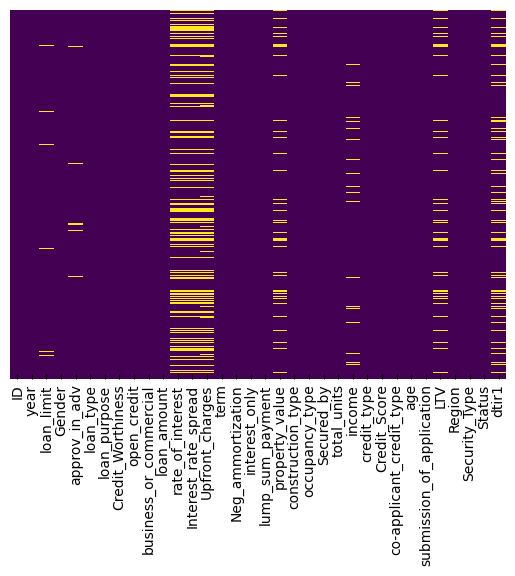

In [20]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Pie chart Graphs to check frequency region and loan purpose in a Dataset

([<matplotlib.patches.Wedge at 0x1c16d322a88>,
 [Text(-0.008995408754127082, 1.099963218758403, 'North'),
  Text(-0.22036708868183472, -1.077700490036955, 'south'),
  Text(1.0695159326560089, -0.2571685629989551, 'central'),
  Text(1.0996254343670884, -0.028703729600740396, 'North-East')],
 [Text(-0.004906586593160226, 0.5999799375045834, '50.26%'),
  Text(-0.12020023019009166, -0.587836630929248, '43.06%'),
  Text(0.5833723269032776, -0.14027376163579366, '5.85%'),
  Text(0.5997956914729572, -0.01565657978222203, '0.83%')])

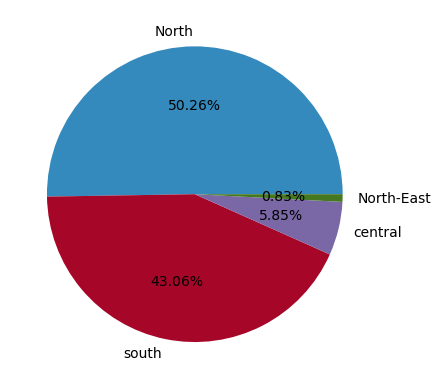

In [21]:
region_names=df.Region.value_counts().index
region_val=df.Region.value_counts().values
plt.pie(region_val,labels=region_names[:],autopct='%1.2f%%')

# Observations:
    Most are the peple belongd to North regions
    There are very less people belongs to North-East
    

([<matplotlib.patches.Wedge at 0x1c16d413c08>,
 [Text(0.41593847309550813, 1.0183296060701454, 'p3'),
  Text(-1.0201060611602615, -0.41156241809001143, 'p4'),
  Text(0.710322529200467, -0.8399058902700064, 'p1'),
  Text(1.0973637714591258, -0.07611013788585434, 'p2')],
 [Text(0.22687553077936803, 0.5554525124018974, '37.66%'),
  Text(-0.5564214879055971, -0.22448859168546076, '36.89%'),
  Text(0.38744865229116376, -0.4581304856018216, '23.25%'),
  Text(0.598562057159523, -0.04151462066501145, '2.20%')])

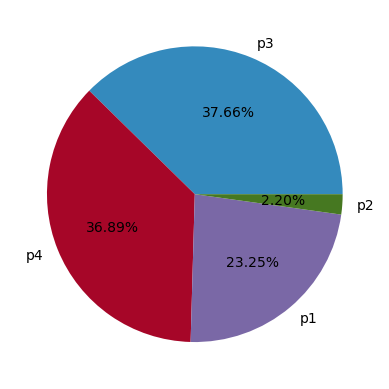

In [22]:
loan_purpose=df.loan_purpose.value_counts().index
val=df.loan_purpose.value_counts().values
plt.pie(val,labels=loan_purpose,autopct='%1.2f%%')

# Feature engineering 

## Removing Irrelevant columns

In [23]:
df.drop(['ID','year'],axis=1,inplace=True)

In [24]:
df

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560,0.2000,595.00,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000,0.3042,0.00,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,436500,3.125,0.2571,9960.00,180.0,not_neg,not_int,not_lpsm,608000.0,sb,pr,home,1U,7860.0,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,cf,Male,nopre,type1,p1,l1,nopc,nob/c,586500,5.190,0.8544,0.00,360.0,not_neg,not_int,not_lpsm,788000.0,sb,ir,home,4U,7140.0,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,cf,Male,nopre,type1,p4,l1,nopc,nob/c,446500,3.125,0.0816,1226.64,180.0,not_neg,not_int,not_lpsm,728000.0,sb,pr,home,1U,6900.0,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,cf,Female,nopre,type1,p4,l1,nopc,nob/c,196500,3.500,0.5824,4323.33,180.0,not_neg,not_int,not_lpsm,278000.0,sb,pr,home,1U,7140.0,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


<AxesSubplot:>

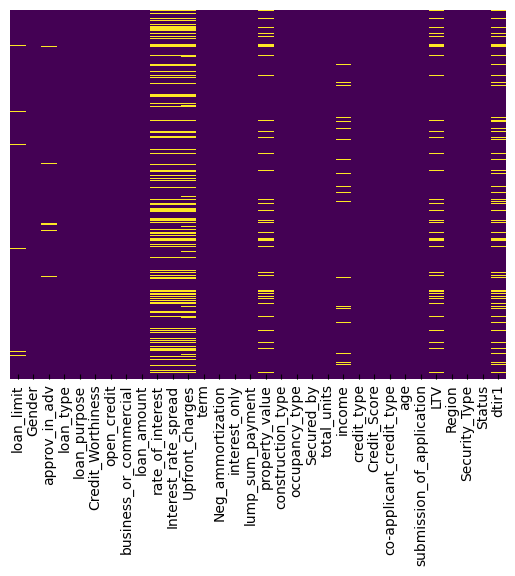

In [25]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [26]:
# df.dropna(inplace=True)

In [27]:
df

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560,0.2000,595.00,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000,0.3042,0.00,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,436500,3.125,0.2571,9960.00,180.0,not_neg,not_int,not_lpsm,608000.0,sb,pr,home,1U,7860.0,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,cf,Male,nopre,type1,p1,l1,nopc,nob/c,586500,5.190,0.8544,0.00,360.0,not_neg,not_int,not_lpsm,788000.0,sb,ir,home,4U,7140.0,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,cf,Male,nopre,type1,p4,l1,nopc,nob/c,446500,3.125,0.0816,1226.64,180.0,not_neg,not_int,not_lpsm,728000.0,sb,pr,home,1U,6900.0,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,cf,Female,nopre,type1,p4,l1,nopc,nob/c,196500,3.500,0.5824,4323.33,180.0,not_neg,not_int,not_lpsm,278000.0,sb,pr,home,1U,7140.0,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [28]:
df.count()

loan_limit                   145326
Gender                       148670
approv_in_adv                147762
loan_type                    148670
loan_purpose                 148536
Credit_Worthiness            148670
open_credit                  148670
business_or_commercial       148670
loan_amount                  148670
rate_of_interest             112231
Interest_rate_spread         112031
Upfront_charges              109028
term                         148629
Neg_ammortization            148549
interest_only                148670
lump_sum_payment             148670
property_value               133572
construction_type            148670
occupancy_type               148670
Secured_by                   148670
total_units                  148670
income                       139520
credit_type                  148670
Credit_Score                 148670
co-applicant_credit_type     148670
age                          148470
submission_of_application    148470
LTV                         

## Detecting and removing Outliers

In [29]:
def detect_outliers(data):
    threshold = 3
    for i in data.columns:
        if data[i].dtype=='float64' or data[i].dtype=='int64':
            mean = np.mean(data[i])
            std = np.std(data[i])
            z_scores = [(y - mean) / std for y in data[column]]
            data = data[np.abs(z_scores) <= threshold]
        return data
df = detect_outliers(df)
df


,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560,0.2000,595.00,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000,0.3042,0.00,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,436500,3.125,0.2571,9960.00,180.0,not_neg,not_int,not_lpsm,608000.0,sb,pr,home,1U,7860.0,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,cf,Male,nopre,type1,p1,l1,nopc,nob/c,586500,5.190,0.8544,0.00,360.0,not_neg,not_int,not_lpsm,788000.0,sb,ir,home,4U,7140.0,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,cf,Male,nopre,type1,p4,l1,nopc,nob/c,446500,3.125,0.0816,1226.64,180.0,not_neg,not_int,not_lpsm,728000.0,sb,pr,home,1U,6900.0,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,cf,Female,nopre,type1,p4,l1,nopc,nob/c,196500,3.500,0.5824,4323.33,180.0,not_neg,not_int,not_lpsm,278000.0,sb,pr,home,1U,7140.0,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [30]:
df.describe()

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [31]:

for i in df.columns:
        
    if df[i].dtype=='float64' or df[i].dtype=='int64':
        

        df[i].fillna(df[i].mean(),inplace=True)
    else:
        df[i].fillna(df[i].mode()[0],inplace=True)
        



df



,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,4.045476,0.441656,3224.996127,360.0,not_neg,not_int,not_lpsm,118000.000000,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.000000
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,4.045476,0.441656,3224.996127,360.0,not_neg,not_int,lpsm,497893.465696,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,72.746457,North,direct,1,37.732932
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560000,0.200000,595.000000,360.0,neg_amm,not_int,not_lpsm,508000.000000,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.000000
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250000,0.681000,3224.996127,360.0,not_neg,not_int,not_lpsm,658000.000000,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.000000
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000000,0.304200,0.000000,360.0,not_neg,not_int,not_lpsm,758000.000000,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,436500,3.125000,0.257100,9960.000000,180.0,not_neg,not_int,not_lpsm,608000.000000,sb,pr,home,1U,7860.0,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.000000
148666,cf,Male,nopre,type1,p1,l1,nopc,nob/c,586500,5.190000,0.854400,0.000000,360.0,not_neg,not_int,not_lpsm,788000.000000,sb,ir,home,4U,7140.0,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.000000
148667,cf,Male,nopre,type1,p4,l1,nopc,nob/c,446500,3.125000,0.081600,1226.640000,180.0,not_neg,not_int,not_lpsm,728000.000000,sb,pr,home,1U,6900.0,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.000000
148668,cf,Female,nopre,type1,p4,l1,nopc,nob/c,196500,3.500000,0.582400,4323.330000,180.0,not_neg,not_int,not_lpsm,278000.000000,sb,pr,home,1U,7140.0,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.000000


In [32]:
df.isnull().sum()   # After dropping the values

loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status                       0
dtir1                        0
dtype: i

array([[<AxesSubplot:title={'center':'loan_amount'}>,
        <AxesSubplot:title={'center':'rate_of_interest'}>,
        <AxesSubplot:title={'center':'Interest_rate_spread'}>],
       [<AxesSubplot:title={'center':'Upfront_charges'}>,
        <AxesSubplot:title={'center':'term'}>,
        <AxesSubplot:title={'center':'property_value'}>],
       [<AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'Credit_Score'}>,
        <AxesSubplot:title={'center':'LTV'}>],
       [<AxesSubplot:title={'center':'Status'}>,
        <AxesSubplot:title={'center':'dtir1'}>, <AxesSubplot:>]],
      dtype=object)

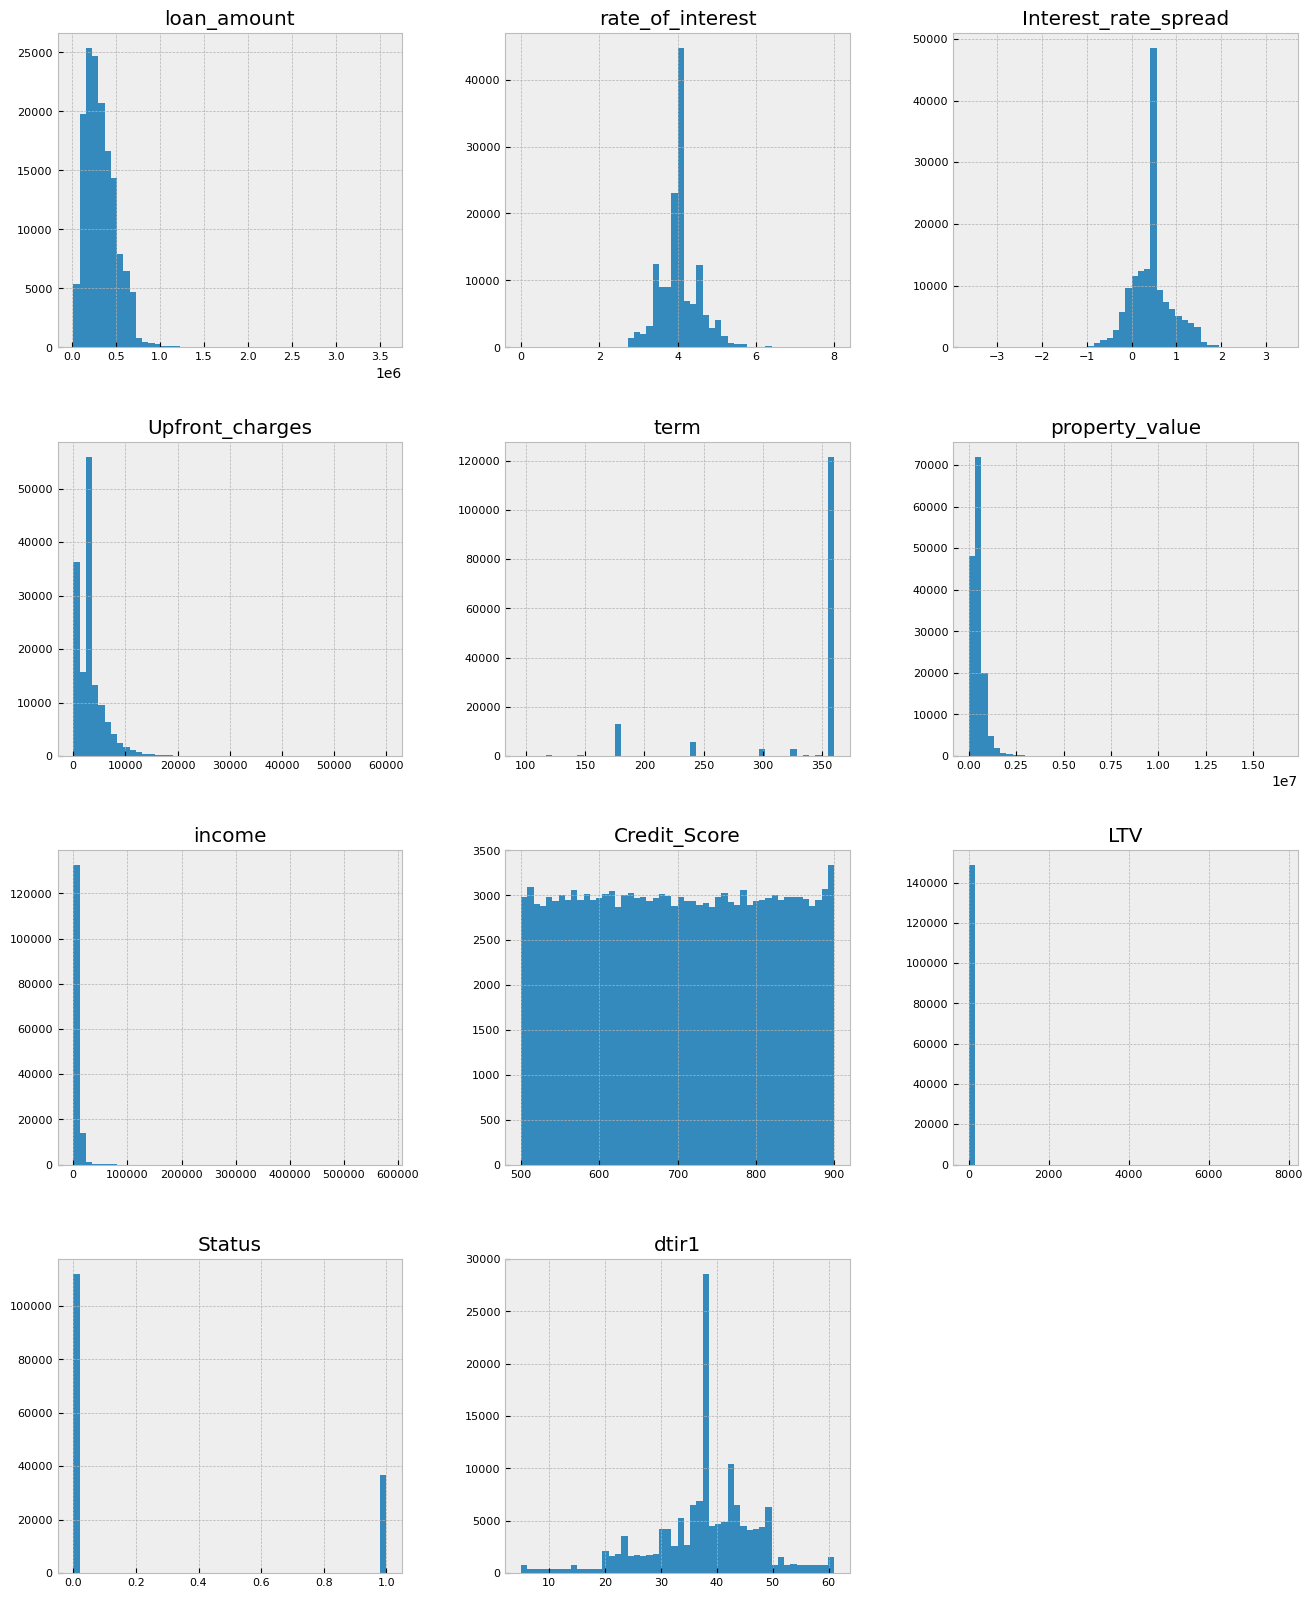

In [33]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

# Checking Relation between Attributes

<AxesSubplot:>

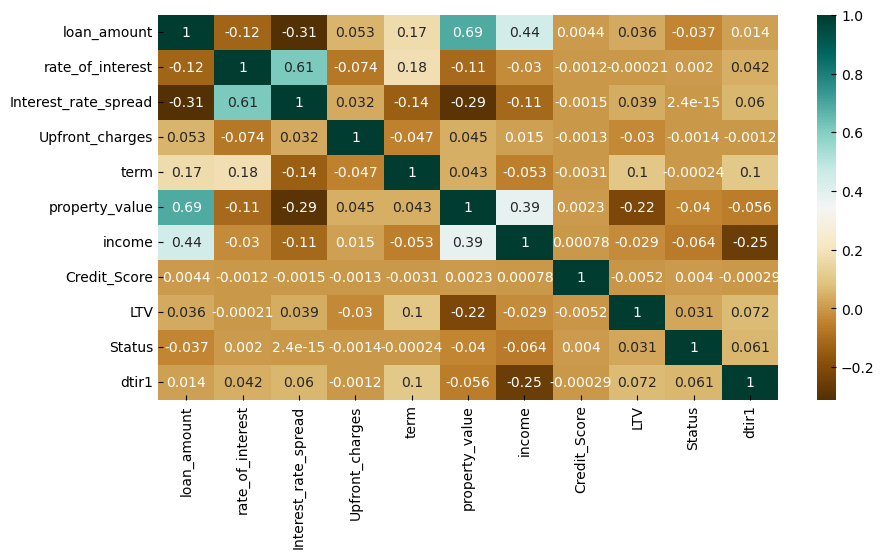

In [34]:
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

In [35]:
df

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,4.045476,0.441656,3224.996127,360.0,not_neg,not_int,not_lpsm,118000.000000,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.000000
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,4.045476,0.441656,3224.996127,360.0,not_neg,not_int,lpsm,497893.465696,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,72.746457,North,direct,1,37.732932
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560000,0.200000,595.000000,360.0,neg_amm,not_int,not_lpsm,508000.000000,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.000000
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250000,0.681000,3224.996127,360.0,not_neg,not_int,not_lpsm,658000.000000,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.000000
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000000,0.304200,0.000000,360.0,not_neg,not_int,not_lpsm,758000.000000,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,436500,3.125000,0.257100,9960.000000,180.0,not_neg,not_int,not_lpsm,608000.000000,sb,pr,home,1U,7860.0,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.000000
148666,cf,Male,nopre,type1,p1,l1,nopc,nob/c,586500,5.190000,0.854400,0.000000,360.0,not_neg,not_int,not_lpsm,788000.000000,sb,ir,home,4U,7140.0,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.000000
148667,cf,Male,nopre,type1,p4,l1,nopc,nob/c,446500,3.125000,0.081600,1226.640000,180.0,not_neg,not_int,not_lpsm,728000.000000,sb,pr,home,1U,6900.0,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.000000
148668,cf,Female,nopre,type1,p4,l1,nopc,nob/c,196500,3.500000,0.582400,4323.330000,180.0,not_neg,not_int,not_lpsm,278000.000000,sb,pr,home,1U,7140.0,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.000000


In [36]:
df['Gender'].replace(['Sex Not Available'],df['Gender'].mode(),inplace=True)

In [37]:
df.to_csv('Preprocess Data')

In [38]:
print(df.columns)
df.info()

Index(['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'Credit_Worthiness', 'open_credit', 'business_or_commercial',
       'loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'Neg_ammortization', 'interest_only',
       'lump_sum_payment', 'property_value', 'construction_type',
       'occupancy_type', 'Secured_by', 'total_units', 'income', 'credit_type',
       'Credit_Score', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'LTV', 'Region', 'Security_Type', 'Status',
       'dtir1'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 148670 non-null  object 
 1   Gender                     148670 non-null  object 
 2   approv_in_adv              148670 non-null  object

In [39]:
print(df['loan_limit'].unique())
print(df['Gender'].unique())
print(df['approv_in_adv'].unique())
print(df['loan_type'].unique())
print(df['loan_purpose'].unique())
print(df['Credit_Worthiness'].unique())
print(df['business_or_commercial'].unique())
print(df['Neg_ammortization'].unique())
print(df['interest_only'].unique())
print(df['lump_sum_payment'].unique())
print(df['construction_type'].unique())
print(df['occupancy_type'].unique())
print(df['Secured_by'].unique())
print(df['total_units'].unique())
print(df['credit_type'].unique())
print(df['co-applicant_credit_type'].unique())
print(df['age'].unique())
print(df['Region'].unique())



['cf' 'ncf']
['Male' 'Joint' 'Female']
['nopre' 'pre']
['type1' 'type2' 'type3']
['p1' 'p4' 'p3' 'p2']
['l1' 'l2']
['nob/c' 'b/c']
['not_neg' 'neg_amm']
['not_int' 'int_only']
['not_lpsm' 'lpsm']
['sb' 'mh']
['pr' 'sr' 'ir']
['home' 'land']
['1U' '2U' '3U' '4U']
['EXP' 'EQUI' 'CRIF' 'CIB']
['CIB' 'EXP']
['25-34' '55-64' '35-44' '45-54' '65-74' '>74' '<25']
['south' 'North' 'central' 'North-East']


# Handling Categorical values

In [40]:

categorical_cols =df.select_dtypes(include=['object']).columns
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))    
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

#One-hot-encode the categorical columns.
#Unfortunately outputs an array instead of dataframe.
array_hot_encoded = ohe.fit_transform(df[categorical_cols])

#Convert it to df
data_hot_encoded = pd.DataFrame(array_hot_encoded, index=df.index)

#Extract only the columns that didnt need to be encoded
data_other_cols = df.drop(columns=categorical_cols)

#Concatenate the two dataframes : 
data_out = pd.concat([data_hot_encoded, data_other_cols], axis=1)

In [41]:
del df['submission_of_application']

In [42]:
df

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,LTV,Region,Security_Type,Status,dtir1
0,0,2,0,0,0,0,0,1,116500,4.045476,0.441656,3224.996127,360.0,1,1,1,118000.000000,1,1,0,0,1740.0,3,758,0,0,98.728814,3,1,1,45.000000
1,0,2,0,1,0,0,0,0,206500,4.045476,0.441656,3224.996127,360.0,1,1,0,497893.465696,1,1,0,0,4980.0,2,552,1,3,72.746457,0,1,1,37.732932
2,0,2,1,0,0,0,0,1,406500,4.560000,0.200000,595.000000,360.0,0,1,1,508000.000000,1,1,0,0,9480.0,3,834,0,1,80.019685,3,1,0,46.000000
3,0,2,0,0,3,0,0,1,456500,4.250000,0.681000,3224.996127,360.0,1,1,1,658000.000000,1,1,0,0,11880.0,3,587,0,2,69.376900,0,1,0,42.000000
4,0,1,1,0,0,0,0,1,696500,4.000000,0.304200,0.000000,360.0,1,1,1,758000.000000,1,1,0,0,10440.0,1,602,1,0,91.886544,0,1,0,39.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,0,2,0,0,2,0,0,1,436500,3.125000,0.257100,9960.000000,180.0,1,1,1,608000.000000,1,1,0,0,7860.0,0,659,1,3,71.792763,3,1,0,48.000000
148666,0,2,0,0,0,0,0,1,586500,5.190000,0.854400,0.000000,360.0,1,1,1,788000.000000,1,0,0,3,7140.0,0,569,0,0,74.428934,3,1,0,15.000000
148667,0,2,0,0,3,0,0,1,446500,3.125000,0.081600,1226.640000,180.0,1,1,1,728000.000000,1,1,0,0,6900.0,0,702,1,2,61.332418,0,1,0,49.000000
148668,0,0,0,0,3,0,0,1,196500,3.500000,0.582400,4323.330000,180.0,1,1,1,278000.000000,1,1,0,0,7140.0,3,737,1,3,70.683453,0,1,0,29.000000


In [43]:
#setting target attribute 'Status'
X=df.drop('Status',axis='columns')
Y=df.Status
 

In [44]:
X

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,LTV,Region,Security_Type,dtir1
0,0,2,0,0,0,0,0,1,116500,4.045476,0.441656,3224.996127,360.0,1,1,1,118000.000000,1,1,0,0,1740.0,3,758,0,0,98.728814,3,1,45.000000
1,0,2,0,1,0,0,0,0,206500,4.045476,0.441656,3224.996127,360.0,1,1,0,497893.465696,1,1,0,0,4980.0,2,552,1,3,72.746457,0,1,37.732932
2,0,2,1,0,0,0,0,1,406500,4.560000,0.200000,595.000000,360.0,0,1,1,508000.000000,1,1,0,0,9480.0,3,834,0,1,80.019685,3,1,46.000000
3,0,2,0,0,3,0,0,1,456500,4.250000,0.681000,3224.996127,360.0,1,1,1,658000.000000,1,1,0,0,11880.0,3,587,0,2,69.376900,0,1,42.000000
4,0,1,1,0,0,0,0,1,696500,4.000000,0.304200,0.000000,360.0,1,1,1,758000.000000,1,1,0,0,10440.0,1,602,1,0,91.886544,0,1,39.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,0,2,0,0,2,0,0,1,436500,3.125000,0.257100,9960.000000,180.0,1,1,1,608000.000000,1,1,0,0,7860.0,0,659,1,3,71.792763,3,1,48.000000
148666,0,2,0,0,0,0,0,1,586500,5.190000,0.854400,0.000000,360.0,1,1,1,788000.000000,1,0,0,3,7140.0,0,569,0,0,74.428934,3,1,15.000000
148667,0,2,0,0,3,0,0,1,446500,3.125000,0.081600,1226.640000,180.0,1,1,1,728000.000000,1,1,0,0,6900.0,0,702,1,2,61.332418,0,1,49.000000
148668,0,0,0,0,3,0,0,1,196500,3.500000,0.582400,4323.330000,180.0,1,1,1,278000.000000,1,1,0,0,7140.0,3,737,1,3,70.683453,0,1,29.000000


In [45]:
Y

0         1
1         1
2         0
3         0
4         0
         ..
148665    0
148666    0
148667    0
148668    0
148669    0
Name: Status, Length: 148670, dtype: int64

In [46]:

from sklearn.model_selection import train_test_split
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X,Y,test_size=0.20)


# Applying Decision Tree

In [47]:
# Create Decision Tree classifer object
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_Train,Y_Train)

In [48]:
pre=clf.predict(X_Test)

In [49]:
pre

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

# Evaluating the  and Saving Model

In [50]:
import pickle

In [51]:
from sklearn import metrics


print("Accuracy:",metrics.accuracy_score(pre, Y_Test))

Accuracy: 0.9998318423353737


In [52]:
filename = 'Decision Tree _model.sav'
pickle.dump(clf, open(filename, 'wb'))

# Applying KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_Train, Y_Train)

KNeighborsClassifier()

In [55]:
y_pred = knn.predict(X_Test)

# Evaluating the  and Saving Model

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(Y_Test, y_pred)
mse = mean_squared_error(Y_Test, y_pred)
rmse = mean_squared_error(Y_Test, y_pred, squared=False)

print(f'mae: {mae}')
print(f'mse: {mse}')
print(f'rmse: {rmse}')

mae: 0.1262864061343916
mse: 0.1262864061343916
rmse: 0.3553679869295933


In [57]:
filename = 'Knn Tree _model.sav'
pickle.dump(knn, open(filename, 'wb'))

# Applying Gaussian Naive Bayes

In [58]:
from sklearn.naive_bayes import GaussianNB

In [59]:
gnb = GaussianNB()
y_pred = gnb.fit(X_Train, Y_Train).predict(X_Test)


# Evaluating the  and Saving Model

In [60]:
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(Y_Test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 90.74460213896549


In [61]:
filename = 'Naive Bayes Tree _model.sav'
pickle.dump(gnb, open(filename, 'wb'))